# Modern Portfolio Theory with Stock Data

## Part 1: Calculating the Return, Volatility and Efficient Frontier

In this part we are using the stock data of Facebook, Apple, Netflix, Amazon and Tesla to create our portfolio and analyse them by creating 30,000 portfolios using Monte Carlo Simulation

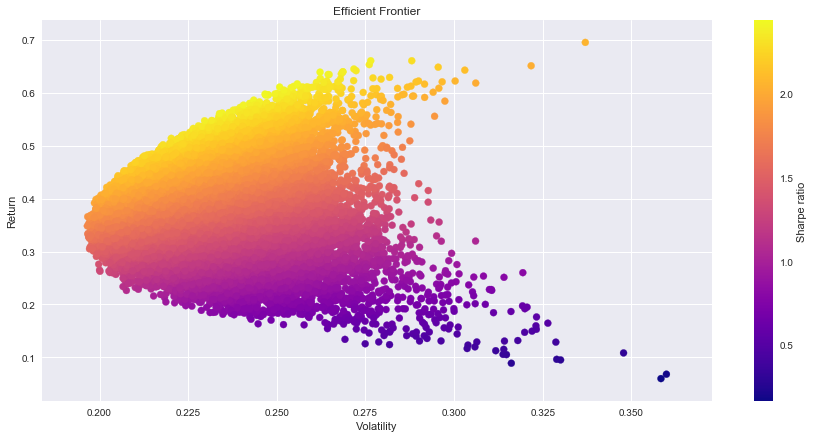

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

selected = ['FB', 'APPL', 'NFLX', 'AMZN', 'TSLA']
df_fb = pd.read_csv("/Users/mbp/Desktop/FB.csv")
df_appl = pd.read_csv("/Users/mbp/Desktop/AAPL.csv")
df_ntflx = pd.read_csv("/Users/mbp/Desktop/NFLX.csv")
df_amzn = pd.read_csv("/Users/mbp/Desktop/AMZN.csv")
df_tsla = pd.read_csv("/Users/mbp/Desktop/TSLA.csv")

# Converting the Date object into datetime type

df_fb["Date"] = pd.to_datetime(df_fb.Date)
df_appl["Date"] = pd.to_datetime(df_appl.Date)
df_ntflx["Date"] = pd.to_datetime(df_ntflx.Date)
df_amzn["Date"] = pd.to_datetime(df_amzn.Date)
df_tsla["Date"] = pd.to_datetime(df_tsla.Date)

# Setting the Date column as the index of the data frame

df_fb.set_index("Date", inplace=True)
df_appl.set_index("Date", inplace=True)
df_ntflx.set_index("Date", inplace=True)
df_amzn.set_index("Date", inplace=True)
df_tsla.set_index("Date", inplace=True)

# Now concatenating all stocks 'Close' data together and renaming them

stocks = pd.concat([df_fb.Close, df_appl.Close, df_ntflx.Close, df_amzn.Close, df_tsla.Close],axis=1)
stocks.columns = ["FB Close", "Apple Close", "Netflix Close", "Amazon Close", "Tesla Close"]

# Now finding the returns of each day based on the closed prices of the crypto coins and omitting NaN values with .dropna()
returns = stocks.pct_change().dropna()
returns.columns = ["FB Return", "Apple Return", "Netflix Return", "Amazon Return", "Tesla Return"]

# Now finding the total annual return of each stock
annual_return = returns.mean()*252

# Now finding the covariance of each stock
annual_cov = returns.cov()*252

# Now calculating the return and volatility for Efficient Frontier
pf_returns, pf_volatility, pf_sharpe_ratio, pf_stocks_weights = ([] for i in range(4))
num_portfolios = 30000
for portfolio in range(num_portfolios):
    weights = np.random.random(5)
    weights /= np.sum(weights)
    returns_1 = np.dot(weights, annual_return)
    volatility = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))
    sharpe = returns_1/volatility
    pf_stocks_weights.append(weights)
    pf_returns.append(returns_1)
    pf_volatility.append(volatility)
    pf_sharpe_ratio.append(sharpe)

portfolio = {
    'Returns': pf_returns,
    'Volatility': pf_volatility,
    'Sharpe Ratio': pf_sharpe_ratio
}

# Iterating over our stocks symbols list and assigning their corresponding weights to the portfolio dictionary
for counter, symbol in enumerate(selected):
    portfolio[symbol + " Weight"] = [weight[counter] for weight in pf_stocks_weights]

df = pd.DataFrame(portfolio)
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]
df = df[column_order]

plt.figure(figsize=[15,7])
plt.scatter(x=pf_volatility,y=pf_returns,c=pf_sharpe_ratio, cmap="plasma")
plt.colorbar(label="Sharpe ratio")
sns.set(style="darkgrid")
plt.title("Efficient Frontier")
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.show()


## Part 2: Finding the most optimized and most less risky portfolio

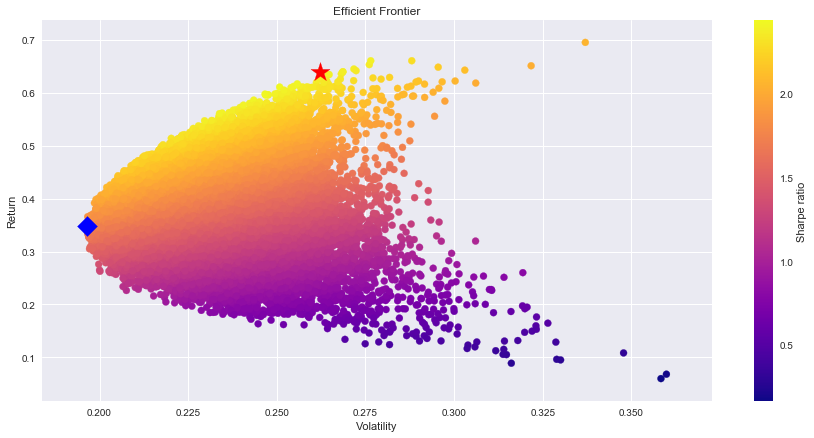

In [57]:
min_volatility = df["Volatility"].min()
max_sharpe = df["Sharpe Ratio"].max()

sharpe_portfolio = df.loc[df["Sharpe Ratio"] == max_sharpe]
min_risk_portfolio = df.loc[df["Volatility"] == min_volatility]

plt.figure(figsize=[15,7])
plt.scatter(x=pf_volatility,y=pf_returns,c=pf_sharpe_ratio,cmap="plasma")
plt.colorbar(label="Sharpe ratio")
plt.scatter(x=sharpe_portfolio["Volatility"], y=sharpe_portfolio["Returns"], c="red", marker='*',s=400)
plt.scatter(x=min_risk_portfolio["Volatility"], y=min_risk_portfolio["Returns"], c="blue", marker='D',s=200)
sns.set(style="darkgrid")
plt.title("Efficient Frontier")
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.show()


In [58]:
print(sharpe_portfolio.T)
print(min_risk_portfolio.T)

                 28449
Returns       0.639093
Volatility    0.262212
Sharpe Ratio  2.437315
FB Weight     0.028116
APPL Weight   0.030503
NFLX Weight   0.377764
AMZN Weight   0.561460
TSLA Weight   0.002156
                 26806
Returns       0.348360
Volatility    0.196560
Sharpe Ratio  1.772280
FB Weight     0.259990
APPL Weight   0.514220
NFLX Weight   0.039408
AMZN Weight   0.165371
TSLA Weight   0.021011


Here we can see from the result of sharpe_portfolio which is our best optimised portfolio, that to get the best possible return considering a high risk we should have around 56% weightage of Amazon(AMZN) stock, 37% weightage of Netflix(NFLX) stock , 2% weightage of Facebook(FB) stock, 3% weightage of Apple(APPL) stock and 0.2% weightage of Tesla(TSLA) stock which gives us an expected Return of 64% with a risk (Volatility) of 26.2%.

And for the minimum risk portfolio we can analyse that we need to have around 25% Facebook stock, 51% Apple stock, 4% Netflix stock, 16% Amazon stock and 2% Tesla stock which gives us an expected Return of 35% with a risk (Volatility) of 19.6%.